# Analysis on residential prices evolution and household indebtedness in DK, FI, SE and GR

This notebook extracts residential property price data, residential property valuation data, and household liabilities data from ECB's Statistical Data Warehouse using SDMX.

Quick tutorial on pandasdmx:
https://pandasdmx.readthedocs.io/en/latest/usage.html#obtaining-and-exploring-metadata-about-datasets

In [1]:
from pandasdmx import Request
from IPython.display import display_html
from IPython.display import display
import pandas as pd

In [2]:
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

In [3]:
# Define connection to ECB
ecb = Request('ECB')
cat_response = ecb.categoryscheme()

In [4]:
# Get RPV data
dsd_id = cat_response.dataflow.RPV.structure.id
refs = dict(references = 'all')
dsd_response = ecb.datastructure(resource_id = dsd_id, params = refs)
dsd = dsd_response.datastructure[dsd_id]
#display(dsd.dimensions.aslist())

data_response = Request('ecb_s').data(resource_id = 'RPV', key={'FREQ': ['Q'], 'REF_AREA': ['SE', 'FI', 'DK', 'GR'], 'RPP_SUFFIX': ['MB']}, dsd=dsd)
data = data_response.data
series_l = list(data.series)
set(s.key.ADJUSTMENT for s in data.series)
series = (s for s in data.series)
RPV = data_response.write(series)
display_side_by_side(RPV.head(5), RPV.tail(5))

FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 ED 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 3 
 3 
 3 
 3 
 
 
 RPP_SUFFIX 
 MB 
 MB 
 MB 
 MB 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2007Q1 
 23.0 
 3.0 
 6.0 
 -12.0 
 
 
 2007Q2 
 25.0 
 3.0 
 3.0 
 -9.0 
 
 
 2007Q3 
 25.0 
 1.0 
 5.0 
 -7.0 
 
 
 2007Q4 
 22.0 
 0.0 
 3.0 
 -13.0 
 
 
 2008Q1 
 18.0 
 -1.0 
 0.0 
 -13.0 
 
 
 
 
 
 FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 ED 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 3 
 3 
 3 
 3 
 
 
 RPP_SUFFIX 
 MB 
 MB 
 MB 
 MB 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2016Q4 
 -1.0 
 1.0 
 -4.0 
 27.0 
 
 
 2017Q1 
 -6.0 
 2.0 
 -8.0 
 29.0 
 
 
 2017Q2 
 -2.0 
 2.0 
 -9.0 
 32.0 
 
 
 2017Q3 
 -1.0 
 2.0 
 -9.0 
 35.0 
 
 
 2017Q4 
 NaN 
 2.0 
 -8.0 
 39.0

In [5]:
# Get RPP data (new and existing flats for Greece (TF), otherwise new and existing dwellings (TD))
dsd_id = cat_response.dataflow.RPP.structure.id
refs = dict(references = 'all')
dsd_response = ecb.datastructure(resource_id = dsd_id, params = refs)
dsd = dsd_response.datastructure[dsd_id]
#display(dsd.dimensions.aslist())
data_response = Request('ecb_s').data(resource_id = 'RPP',
                    key={'FREQ': ['Q'], 'REF_AREA': ['SE', 'FI', 'DK', 'GR'],'ADJUSTMENT': ['N'], 'RPP_DWELLING': ['TD', 'TF']},
                                      params = {'startPeriod': '2007'},dsd=dsd)
data = data_response.data
series_l = list(data.series)
set(s.key.ADJUSTMENT for s in data.series)
series = (s for s in data.series)
RPP = data_response.write(series)

# Drop extra columns
RPP = RPP.iloc[:, ((RPP.columns.get_level_values(1).isin(['DK','FI','SE'])) & (RPP.columns.get_level_values(3) == 'TD')) | 
                  ((RPP.columns.get_level_values(1).isin(['GR'])) & (RPP.columns.get_level_values(3) == 'TF')) & (RPP.columns.get_level_values(5) == '3') ]

display_side_by_side(RPP.head(5), RPP.tail(5))

FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 TD 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 4 
 4 
 3 
 4 
 
 
 RPP_SUFFIX 
 00 
 00 
 00 
 00 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2007Q1 
 105.01 
 85.08 
 98.56 
 62.15 
 
 
 2007Q2 
 106.41 
 86.56 
 99.63 
 65.96 
 
 
 2007Q3 
 106.58 
 86.82 
 100.65 
 68.35 
 
 
 2007Q4 
 104.58 
 87.00 
 101.16 
 66.37 
 
 
 2008Q1 
 103.24 
 87.88 
 101.41 
 66.56 
 
 
 
 
 
 FREQ 
 Q 
 
 
 REF_AREA 
 DK 
 FI 
 GR 
 SE 
 
 
 ADJUSTMENT 
 N 
 N 
 N 
 N 
 
 
 RPP_DWELLING 
 TD 
 TD 
 TF 
 TD 
 
 
 RPP_GEO_COV 
 00 
 00 
 00 
 00 
 
 
 RPP_SOURCE 
 4 
 4 
 3 
 4 
 
 
 RPP_SUFFIX 
 00 
 00 
 00 
 00 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 2016Q4 
 104.58 
 100.59 
 59.33 
 111.15 
 
 
 2017Q1 
 106.61 
 101.57 
 59.03 
 113.95 
 
 
 2017Q2 
 110.47 
 102.68 
 58.97 
 116.15 
 
 
 2017Q3 
 110.98 
 102.18 
 58.89 
 117.76 
 
 
 2017Q4 
 109.14 
 101.83 
 59.15 
 114.44

In [6]:
# Household debt - loans, % of GDP (annual)
estat = Request('ESTAT')

# non-consolidated
resp = estat.data('tipspd15')
data = resp.data
series_l = list(data.series)
data = resp.write(s for s in resp.data.series if s.key.SECTOR == 'S14' and s.key.GEO in ['SE', 'FI', 'DK', 'EL'])

# consolidated
resp2 = estat.data('tipspd25')
data2 = resp2.data
series_l2 = list(data2.series)
data2 = resp2.write(s for s in resp2.data.series if s.key.SECTOR == 'S14' and s.key.GEO in ['SE', 'FI', 'DK', 'EL'])

# As we see, for households no difference bertween consolidated and non-consolidated
display_side_by_side(data.head(),data2.head())
debt = data2

FINPOS 
 LIAB 
 
 
 UNIT 
 PC_GDP 
 
 
 CO_NCO 
 NCO 
 
 
 SECTOR 
 S14 
 
 
 NA_ITEM 
 F4 
 
 
 GEO 
 DK 
 EL 
 FI 
 SE 
 
 
 FREQ 
 A 
 A 
 A 
 A 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 1995 
 77.3 
 5.6 
 33.9 
 43.9 
 
 
 1996 
 79.2 
 6.5 
 31.6 
 43.9 
 
 
 1997 
 82.1 
 7.2 
 29.7 
 44.4 
 
 
 1998 
 87.4 
 8.3 
 29.2 
 44.9 
 
 
 1999 
 86.7 
 9.8 
 30.8 
 46.2 
 
 
 
 
 
 FINPOS 
 LIAB 
 
 
 UNIT 
 PC_GDP 
 
 
 CO_NCO 
 CO 
 
 
 SECTOR 
 S14 
 
 
 NA_ITEM 
 F4 
 
 
 GEO 
 DK 
 EL 
 FI 
 SE 
 
 
 FREQ 
 A 
 A 
 A 
 A 
 
 
 TIME_PERIOD 
 
 
 
 
 
 
 
 
 1995 
 77.3 
 5.6 
 33.9 
 43.9 
 
 
 1996 
 79.2 
 6.5 
 31.6 
 43.9 
 
 
 1997 
 82.1 
 7.2 
 29.7 
 44.4 
 
 
 1998 
 87.4 
 8.3 
 29.2 
 44.9 
 
 
 1999 
 86.7 
 9.8 
 30.8 
 46.2

In [7]:
# Flatten multi-level columns in data frames and harmonize country names
combined = [RPP, RPV]
for dataset in combined:
    new_col_names = [b for a,b,c,d,e,f,g in dataset.columns.get_values()]
    dataset.columns = new_col_names    

new_col_names = [f for a,b,c,d,e,f,g in debt.columns.get_values()]
new_col_names = [w.replace('EL', 'GR') for w in new_col_names]
debt.columns = new_col_names
debt.columns.values.sort()

display_side_by_side(RPP.head(5),RPV.head(5), debt.head(5))

,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,105.01,85.08,98.56,62.15
2007Q2,106.41,86.56,99.63,65.96
2007Q3,106.58,86.82,100.65,68.35
2007Q4,104.58,87.00,101.16,66.37
2008Q1,103.24,87.88,101.41,66.56
,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,23.0,3.0,6.0,-12.0
2007Q2,25.0,3.0,3.0,-9.0


In [8]:
# Upsample debt to quarterly frequency using linear interpolation and align start/end dates
debt = debt.resample('Q').interpolate('linear')
debt = debt[(debt.index >= '2007Q1') & (debt.index < '2017Q4')]
RPV = RPV[(RPV.index >= '2007Q1') & (RPV.index < '2017Q4')]
RPP = RPP[(RPP.index >= '2007Q1') & (RPP.index < '2017Q4')]

display_side_by_side(RPP.head(5),RPV.head(5), debt.head(5))
display_side_by_side(RPP.tail(5),RPV.tail(5), debt.tail(5))

,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,105.01,85.08,98.56,62.15
2007Q2,106.41,86.56,99.63,65.96
2007Q3,106.58,86.82,100.65,68.35
2007Q4,104.58,87.00,101.16,66.37
2008Q1,103.24,87.88,101.41,66.56
,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,23.0,3.0,6.0,-12.0
2007Q2,25.0,3.0,3.0,-9.0


,DK,FI,GR,SE
TIME_PERIOD,,,,
2016Q3,106.19,100.73,59.27,109.54
2016Q4,104.58,100.59,59.33,111.15
2017Q1,106.61,101.57,59.03,113.95
2017Q2,110.47,102.68,58.97,116.15
2017Q3,110.98,102.18,58.89,117.76
,DK,FI,GR,SE
TIME_PERIOD,,,,
2016Q3,0.0,1.0,-5.0,25.0
2016Q4,-1.0,1.0,-4.0,27.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.close('all')

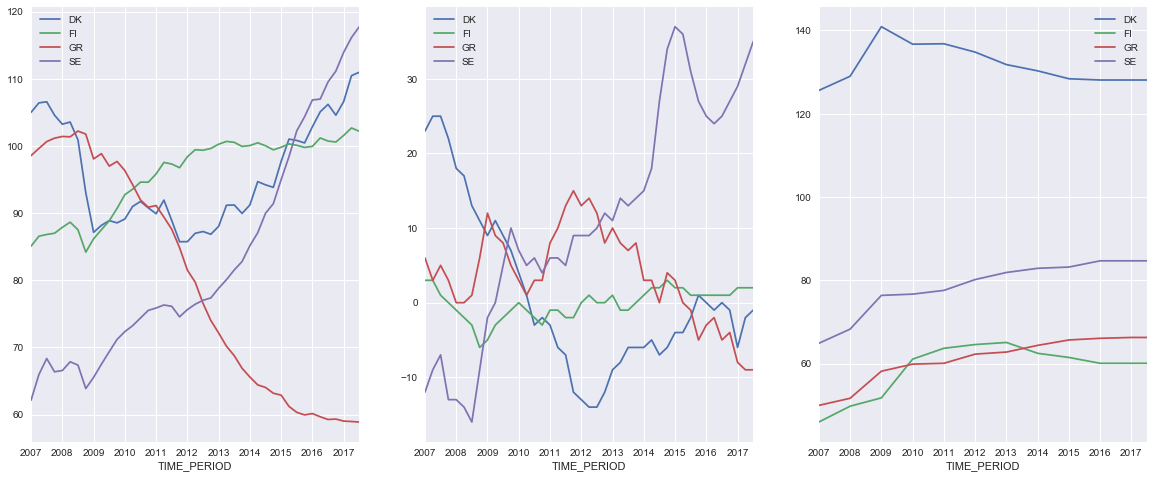

In [10]:
# Plot the three data frames
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
RPP.plot(ax=axes[0])
RPV.plot(ax=axes[1])
debt.plot(ax=axes[2])

In [16]:
# Re-index data so that both debt and prices start at 100
RPP_index = RPP.copy()
#RPV_index = RPV.copy()
debt_index = debt.copy()

combined = [RPP_index, debt_index]

for df in combined:
    df['type'] = 't1'
    for country in df.columns.values[:-1]:
        gg = df.groupby('type')[country].apply(lambda x: x.div(x.iloc[0]).subtract(1))
        df[country] = (1 + gg) * 100
    df.drop(['type'], axis = 1, inplace = True)


display_side_by_side(RPP_index.head(5),RPV.head(5),debt_index.head(5))
display_side_by_side(RPP_index.tail(5),RPV.tail(5),debt_index.tail(5))

,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,100.000000,100.000000,100.000000,100.000000
2007Q2,101.333206,101.739539,101.085633,106.130330
2007Q3,101.495096,102.045134,102.120536,109.975865
2007Q4,99.590515,102.256700,102.637987,106.790024
2008Q1,98.314446,103.291020,102.891640,107.095736
,DK,FI,GR,SE
TIME_PERIOD,,,,
2007Q1,23.0,3.0,6.0,-12.0
2007Q2,25.0,3.0,3.0,-9.0


,DK,FI,GR,SE
TIME_PERIOD,,,,
2016Q3,101.123703,118.394452,60.135958,176.251006
2016Q4,99.590515,118.229901,60.196834,178.841512
2017Q1,101.523664,119.381758,59.892451,183.346742
2017Q2,105.199505,120.686413,59.831575,186.886565
2017Q3,105.685173,120.098731,59.750406,189.477072
,DK,FI,GR,SE
TIME_PERIOD,,,,
2016Q3,0.0,1.0,-5.0,25.0
2016Q4,-1.0,1.0,-4.0,27.0


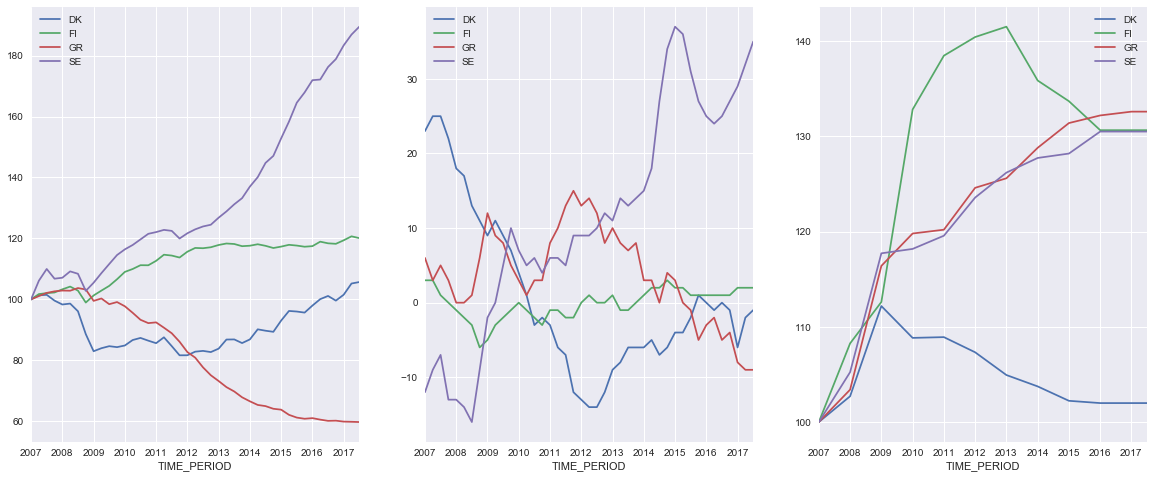

In [12]:
# Plot the three data frames
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
RPP_index.plot(ax=axes[0])
RPV.plot(ax=axes[1])
debt_index.plot(ax=axes[2])

In [13]:
# Export data as json
import collections
import json

RPP = RPP_index
debt = debt_index

def df_to_d3(df_in):
    data = []
    labels = df_in.columns
    indices = df_in.index
    for i in indices:
        mydict = collections.OrderedDict()      
        for l in labels:
            mydict[l] = df_in[l][i]
        data.append(mydict)
    return data

df = pd.concat([RPP, RPV, debt], axis = 1)
df.columns = ['DK_RPP','FI_RPP','GR_RPP','SE_RPP','DK_RPV','FI_RPV','GR_RPV','SE_RPV','DK_debt','FI_debt','GR_debt','SE_debt']
with open('data_export.json', 'w') as outfile:
    json.dump(df_to_d3(df), outfile)